In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 4.1 Generate synthetic data

n = 200, mean(Y) = 3.4543, std(Y) = 1.3229


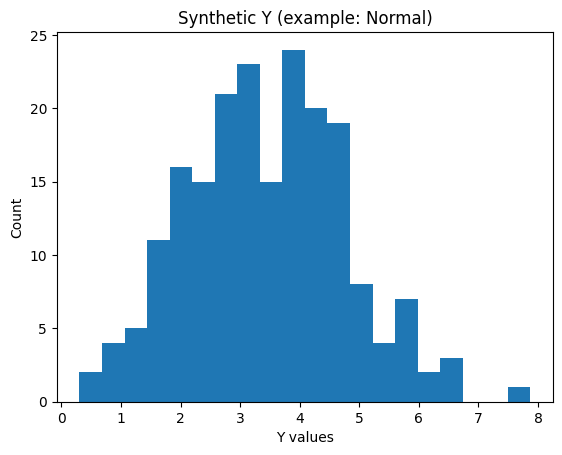

In [3]:
r=np.random.default_rng(42)
n=200
Y = r.normal(loc=3.5, scale=1.5, size=n)
print(f"n = {n}, mean(Y) = {Y.mean():.4f}, std(Y) = {Y.std(ddof=1):.4f}")
plt.figure()
plt.hist(Y, bins=20)
plt.xlabel("Y values")
plt.ylabel("Count")
plt.title("Synthetic Y (example: Normal)")
plt.show()

## 4.2 Create an array of c values and compute MSE(c)

In [4]:
c_grid = np.linspace(0, 10, 1001)
mse_vals = ((Y[:, None] - c_grid[None, :])**2).mean(axis=0)

print(f"MSE computed for {len(c_grid)} values of c.")

MSE computed for 1001 values of c.


## 4.3 Find the optimal c and compare to mean(Y)

In [5]:
idx_min = int(mse_vals.argmin())
c_opt = float(c_grid[idx_min])
y_mean = float(Y.mean())

print(f"Optimal c (argmin of MSE) = {c_opt:.6f}")
print(f"Sample mean of Y          = {y_mean:.6f}")
print("They should be (almost) equal — numerically up to grid resolution.")

Optimal c (argmin of MSE) = 3.450000
Sample mean of Y          = 3.454324
They should be (almost) equal — numerically up to grid resolution.


## 4.4 Plot MSE vs c and mark the optimal c

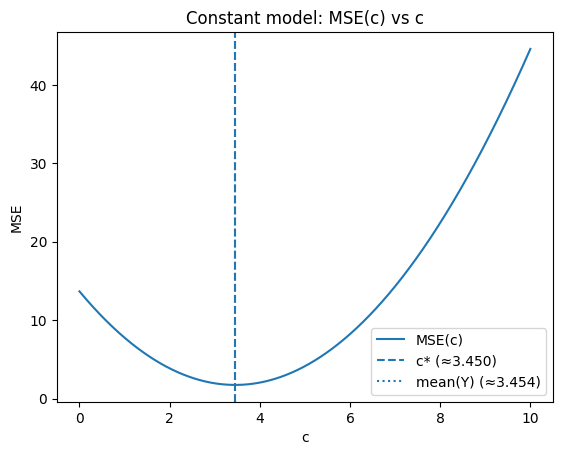

In [6]:
plt.figure()
plt.plot(c_grid, mse_vals, label="MSE(c)")
plt.axvline(c_opt, linestyle="--", linewidth=1.5, label=f"c* (≈{c_opt:.3f})")
plt.axvline(y_mean, linestyle=":", linewidth=1.5, label=f"mean(Y) (≈{y_mean:.3f})")
plt.xlabel("c")
plt.ylabel("MSE")
plt.title("Constant model: MSE(c) vs c")
plt.legend()
plt.show()

## 4.5 What does the curve shape tell us?
**Answer:**  
The shape of the MSE curve is U-shaped, indicating that the error is minimized when c is close to the mean of the data (\overline{Y}). As c moves further away from the mean, the MSE increases.  This happens because, in the formula MSE(c)=E[(Y-c)^2], the error increases quadratically as the value of c diverges from ~Y. So, the optimal constant c is the one that is closest to the mean of the data.

## 4.6 Why is a simple dummy model useful?
1.	Baseline performance: It gives a baseline performance to compare with more complex models. If a more complex model cannot outperform this simple model, there might be issues in the data or the modeling process (e.g., overfitting, poor feature engineering).
2.	Debugging and sanity check: The dummy model helps to catch errors in the data pipeline or evaluation metrics. If the complex model’s performance is significantly worse than the simple model, something might be wrong with the model setup.
3.	Small or noisy datasets: In some cases, especially with small or noisy datasets, a simple model may perform almost as well as more complex models, providing a good initial result with minimal computational cost.
4.	Interpretability: Simple models like the constant model provide insight into the data’s behavior and act as a reference point for understanding how much more complex models improve upon them.